## Cat vs Dog Classification

In [66]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

### **Importing the libraries**

In [1]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

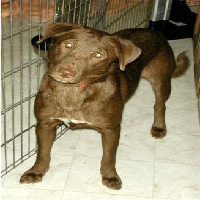

In [68]:
img = image.load_img('/kaggle/input/dogs-vs-cats/train/dogs/dog.1.jpg', target_size=(200,200))
img

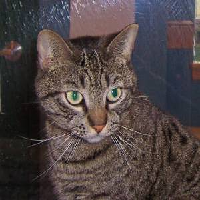

In [69]:
img = image.load_img('/kaggle/input/dogs-vs-cats/train/cats/cat.1.jpg', target_size=(200,200))
img

### **Data Preprocessing**

In [106]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 30,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2
                                  )
training_set = train_datagen.flow_from_directory('/kaggle/input/dogs-vs-cats/train',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 20000 images belonging to 2 classes.


In [107]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/kaggle/input/dogs-vs-cats/test',
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5000 images belonging to 2 classes.


### **Building the CNN**

In [108]:
cnn = Sequential()

# Convolutional Layer 1
cnn.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=2))

# Convolutional Layer 2
cnn.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=2))

# Convolutional Layer 3
cnn.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=2))

# Flattening Layer
cnn.add(Flatten())

# Dense Layer 1
cnn.add(Dense(units=128, activation='relu'))

# Dropout
cnn.add(Dropout(0.5))

# Output Layer
cnn.add(Dense(units=1, activation='sigmoid'))

In [109]:
cnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 36, 36, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 17, 17, 32)       

### **Compiling the CNN**

In [110]:
cnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

### **Training the CNN on the Training set and evaluating it on the Test set**

In [111]:
batch_size = 32
r = cnn.fit(training_set,
              steps_per_epoch = 2000//batch_size,
              validation_data = test_set, 
              validation_steps = 800//batch_size,
              epochs = 10)

Epoch 1/10
62/62 [==============================] - 20s 280ms/step - loss: 0.7439 - accuracy: 0.5040 - val_loss: 0.6910 - val_accuracy: 0.5575
Epoch 2/10
62/62 [==============================] - 17s 279ms/step - loss: 0.6945 - accuracy: 0.5242 - val_loss: 0.6853 - val_accuracy: 0.5150
Epoch 3/10
62/62 [==============================] - 17s 277ms/step - loss: 0.6941 - accuracy: 0.5539 - val_loss: 0.6727 - val_accuracy: 0.5788
Epoch 4/10
62/62 [==============================] - 17s 281ms/step - loss: 0.6779 - accuracy: 0.5857 - val_loss: 0.6467 - val_accuracy: 0.6200
Epoch 5/10
62/62 [==============================] - 17s 280ms/step - loss: 0.6643 - accuracy: 0.5998 - val_loss: 0.6430 - val_accuracy: 0.5850
Epoch 6/10
62/62 [==============================] - 17s 270ms/step - loss: 0.6558 - accuracy: 0.6164 - val_loss: 0.6048 - val_accuracy: 0.6800
Epoch 7/10
62/62 [==============================] - 17s 268ms/step - loss: 0.6465 - accuracy: 0.6346 - val_loss: 0.6138 - val_accuracy: 0.6525

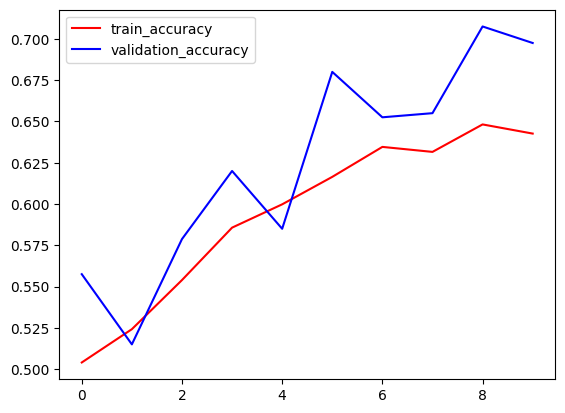

In [112]:
plt.plot(r.history['accuracy'], color='red', label='train_accuracy')
plt.plot(r.history['val_accuracy'], color='Blue', label='validation_accuracy')
plt.legend()
plt.show()

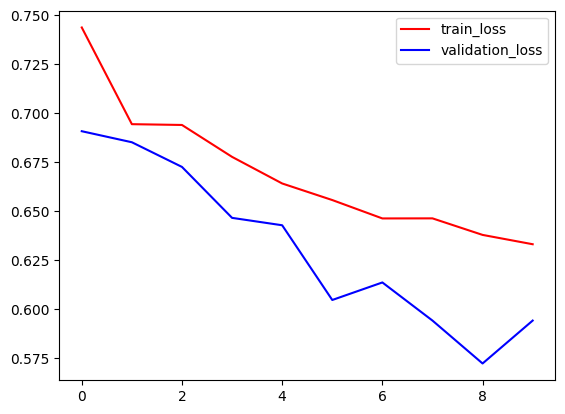

In [113]:
plt.plot(r.history['loss'], color='red', label='train_loss')
plt.plot(r.history['val_loss'], color='Blue', label='validation_loss')
plt.legend()
plt.show()

In [ ]:
## Single Data Prediction

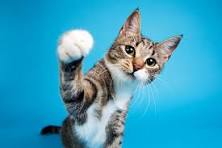

In [136]:
test_img = cv2.imread('/kaggle/input/dog-cat-testset/cat.jpg')
img = image.load_img('/kaggle/input/dog-cat-testset/cat.jpg')
img

In [138]:
test_img = cv2.resize(test_img,(150,150))
test_input = test_img.reshape((1,150,150,3))

In [139]:
result = cnn.predict(test_input)
if result[0][0] == 1:
      prediction = 'dog'
else:
      prediction = 'cat'
print(f"The image is of a: {prediction}")

1/1 [==============================] - 0s 20ms/step
The image is of a: cat


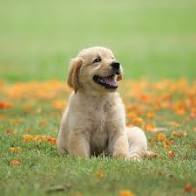

In [132]:
test_img = cv2.imread('/kaggle/input/dog-cat-testset/dog.jpg')
img = image.load_img('/kaggle/input/dog-cat-testset/dog.jpg')
img

In [133]:
test_img = cv2.resize(test_img,(150,150))
test_input = test_img.reshape((1,150,150,3))

In [134]:
result = cnn.predict(test_input)
if result[0][0] == 1:
      prediction = 'dog'
else:
      prediction = 'cat'
print(f"The image is of a: {prediction}")

1/1 [==============================] - 0s 18ms/step
The image is of a: dog
